In [5]:
sys.path.append(r'D:\github\ripple_heterogeneity\python')

import nelpy as nel  # main nelpy imports
import loading
import matplotlib.pyplot as plt
import numpy as np

In [2]:
basepath = r'Z:\\Data\\Kenji\\nlx_070329'
dict_ = loading.load_SleepState_states(basepath)
print(dict_.keys())
epoch_df = loading.load_epoch(basepath)

dict_keys(['wake_id', 'rem_id', 'nrem_id', 'states', 'timestamps', 'WAKEstate', 'NREMstate', 'REMstate', 'WAKEtheta', 'WAKEnontheta', 'THETA', 'nonTHETA'])


In [3]:
import compress_repeated_epochs
epoch_df = compress_repeated_epochs.compress_repeated_epochs(epoch_df)
epoch_df

,name,startTime,stopTime,environment,behavioralParadigm
0,2007-3-29_12-11-20_sleep,0,10048.2,sleep,10
1,2007-3-29_16-06-46_ZigZag,10048.2,15573.9,ZigZag,1
2,2007-3-29_17-42-25_sleep,15573.9,31147.3,sleep,10


[Text(0, 0.05, 'WAKEstate'),
 Text(0, 0.15000000000000002, 'NREMstate'),
 Text(0, 0.25, 'REMstate'),
 Text(0, 0.35000000000000003, 'WAKEtheta'),
 Text(0, 0.45, 'WAKEnontheta'),
 Text(0, 0.55, 'THETA'),
 Text(0, 0.6500000000000001, 'nonTHETA'),
 Text(0, 0.7500000000000001, 'sleep'),
 Text(0, 0.8500000000000001, 'zigzag'),
 Text(0, 0.9500000000000001, 'sleep')]

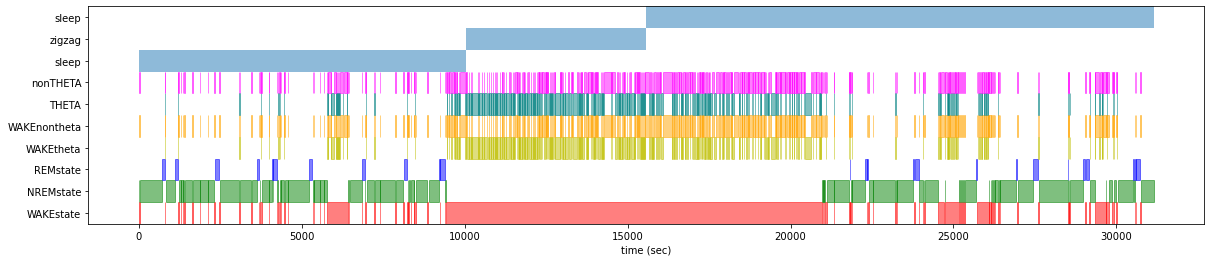

In [6]:
plt.figure(figsize=(20,4))
for pair in dict_['WAKEstate']:
    plt.axvspan(pair[0], pair[1],0,.1, alpha=0.5,color='r')
for pair in dict_['NREMstate']:
    plt.axvspan(pair[0], pair[1],.1,.2, alpha=0.5,color='g')
for pair in dict_['REMstate']:
    plt.axvspan(pair[0], pair[1],.2,.3, alpha=0.5,color='b')
for pair in dict_['WAKEtheta']:
    plt.axvspan(pair[0], pair[1],.3,.4, alpha=0.5,color='y')
for pair in dict_['WAKEnontheta']:
    plt.axvspan(pair[0], pair[1],.4,.5, alpha=0.5,color='orange')
for pair in dict_['THETA']:
    plt.axvspan(pair[0], pair[1],.5,.6, alpha=0.5,color='teal')
for pair in dict_['nonTHETA']:
    plt.axvspan(pair[0], pair[1],.6,.7, alpha=0.5,color='magenta')

for i,ep in enumerate(epoch_df.itertuples()):
    plt.axvspan(ep.startTime, ep.stopTime,.7+i*.1,.8+i*.1, alpha=0.5)
plt.xlabel('time (sec)')
ax = plt.gca()
ax.set_yticks(np.arange(0,1,.1)+.05)

ax.set_yticklabels(['WAKEstate','NREMstate','REMstate','WAKEtheta','WAKEnontheta','THETA','nonTHETA','sleep','zigzag','sleep'])

In [7]:
nrem_epochs = nel.EpochArray(dict_['NREMstate'])
print(nrem_epochs)
wake_epochs = nel.EpochArray(dict_['WAKEstate'])
print(wake_epochs)

behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,
                                                epoch_df.stopTime]).T])
print(behavioral_epochs)
print('')
print('pre-sleep + nrem',behavioral_epochs[0][nrem_epochs])
print('pre-sleep + wake',behavioral_epochs[0][wake_epochs])

print('')
print('task + nrem',behavioral_epochs[1][nrem_epochs])
print('task + wake',behavioral_epochs[1][wake_epochs])

print('')
print('post-task + nrem',behavioral_epochs[2][nrem_epochs])
print('post-task + wake',behavioral_epochs[2][wake_epochs])

<EpochArray at 0x1cc0cdc6970: 77 epochs> of length 3:53:04 hours
<EpochArray at 0x1cc0cdc69a0: 83 epochs> of length 4:12:36 hours
<EpochArray at 0x1cc0cdcf4f0: 3 epochs> of length 8:39:07:321 hours

pre-sleep + nrem <EpochArray at 0x1cc0be4eca0: 40 epochs> of length 1:55:10 hours
pre-sleep + wake <EpochArray at 0x1cc0cdcfa60: 42 epochs> of length 34:44:239 minutes

task + nrem <empty EpochArray at 0x1cc09dd9bb0>
task + wake <EpochArray at 0x1cc0cdc8760: 1 epoch> of length 1:32:05:674 hours

post-task + nrem <EpochArray at 0x1cc0cb9b220: 37 epochs> of length 1:57:54 hours
post-task + wake <EpochArray at 0x1cc0cdcfdf0: 42 epochs> of length 2:05:46:086 hours
